<a href="https://colab.research.google.com/github/austinbennysmith/CMIP6/blob/main/Sahel_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Many of the websites with information about CMIP6 seem to suggest using a csv file that does not actually have all of the data. I found one csv url that actually seems to have been updated, and that's what is shown below. I got it from this webpage: http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/basic_search_and_load.html

And here is the corresponding Github: https://github.com/pangeo-gallery/cmip6

See NDVI assignment from EEPS 1430 for a helpful demo on reshaping netCDF files for monthly averages and other things.


In [ ]:
!pip install zarr
!pip install fsspec
!pip install gcsfs
!pip install netCDF4
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec
import gcsfs

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv') 
df.head()
# activities = df['activity_id']
# unique_activities = []
# for i in activities:
#   if i not in unique_activities:
#     unique_activities.append(i)
# print(unique_activities)

As you can see below, it looks like most of the experiments are included.

In [ ]:
a = df['experiment_id']
def unique_list(start_list):
  unique = []
  for i in start_list:
    if i not in unique:
      unique.append(i)
  print(unique)
unique_list(a)

['histSST', 'piClim-CH4', 'piClim-NTCF', 'piClim-control', 'ssp370', 'hist-1950HC', 'piClim-2xDMS', 'piClim-2xdust', 'piClim-2xfire', 'piClim-2xss', 'piClim-BC', 'piClim-HC', 'piClim-N2O', 'piClim-OC', 'piClim-SO2', 'piClim-aer', '1pctCO2-bgc', '1pctCO2-rad', 'esm-ssp585', 'hist-bgc', 'amip-4xCO2', 'amip-future4K', 'amip-m4K', 'amip-p4K', 'amip', 'abrupt-2xCO2', 'abrupt-solp4p', 'abrupt-0p5xCO2', 'amip-lwoff', 'amip-p4K-lwoff', 'aqua-4xCO2', 'abrupt-solm4p', 'aqua-control-lwoff', 'aqua-control', 'aqua-p4K-lwoff', 'aqua-p4K', '1pctCO2', 'abrupt-4xCO2', 'historical', 'piControl', 'esm-hist', 'esm-piControl', 'ssp126', 'ssp245', 'ssp585', 'esm-piControl-spinup', 'piControl-spinup', 'hist-GHG', 'hist-aer', 'hist-nat', 'hist-CO2', 'hist-sol', 'hist-stratO3', 'hist-volc', 'ssp245-GHG', 'ssp245-aer', 'ssp245-nat', 'ssp245-stratO3', 'dcppA-hindcast', 'dcppA-assim', 'dcppC-hindcast-noAgung', 'dcppC-hindcast-noElChichon', 'dcppC-hindcast-noPinatubo', 'dcppC-amv-neg', 'dcppC-amv-pos', 'dcppC-amv-

In [ ]:
b = df['activity_id']
unique_list(b)

## **Average rainfall in the Sahel 2040-2100 in NCAR models of the ssp534-over scenario**

In [ ]:
# overshoot = df.query("experiment_id == 'ssp534-over'")
# import date2num
from datetime import date, timedelta
import netCDF4 as nc
overshoot = df.query("variable_id == 'pr' & experiment_id == 'ssp534-over' & institution_id == 'NCAR'")
for i in range(len(overshoot)):
  zstore = overshoot.zstore.values[i]
  mapper = fsspec.get_mapper(zstore)
  ds = xr.open_zarr(mapper, consolidated=True, decode_times=False)
  # print(time.attrs)
  print('hello world')
  # print(ds.time)
  dsmean = ds.mean(axis=0)
  # print(ds.dims)
  sahel_region = ds.isel(lat=slice(14,18), lon = slice(0, 31)) #acutually lon should go from -16 to 31
  sahel_mean = sahel_region.mean(axis=1)
  sahel_mean = sahel_mean.mean(axis=1)
  sahel_mean.pr.plot()
  print(sahel_region.pr)
  print(sahel_region.dims)
  print(dsmean.dims)
  plt.show()

ClientConnectorError: ignored

In [ ]:
unique_list(overshoot['source_id'])

zstore = overshoot.zstore.values[-5]
print(zstore)
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True, decode_times=False)
ds

['FGOALS-g3', 'CanESM5', 'CNRM-ESM2-1', 'EC-Earth3', 'IPSL-CM6A-LR', 'MIROC6', 'UKESM1-0-LL', 'MRI-ESM2-0', 'CESM2-WACCM']
gs://cmip6/ScenarioMIP/NCAR/CESM2-WACCM/ssp534-over/r5i1p1f1/Omon/tos/gn/


<xarray.Dataset>
Dimensions:    (d2: 2, nlat: 384, nlon: 320, time: 732, vertices: 4)
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lat_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * time       (time) int64 0 708 1416 2148 2880 ... 531420 532152 532884 533616
    time_bnds  (time, d2) float64 dask.array<chunksize=(732, 2), meta=np.ndarray>
Dimensions without coordinates: d2, vertices
Data variables:
    tos        (time, nlat, nlon) float32 dask.array<chunksize=(199, 384, 320), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   744235.0
    branch_time_in_parent:  744235.0
    case_id:                1662
    cesm_casename:          b.e21.BWSSP534oscmip6.f09_g17.CMIP6-SSP5-3.4OS-WA...
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2020-02-14T21:25:35Z
    data_specs_version:     01.00.31
    experiment:             Gap: Mitigated overshoot scenario with medium/low...
    experiment_id:          ssp534-over
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2-W...
    grid:                   native gx1v7 displaced pole grid (384x320 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     ScenarioMIP
    parent_experiment_id:   ssp585
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2-WACCM
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      5
    realm:                  ocean
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2-WACCM
    source_type:            AGCM BGC CHEM AER
    status:                 2020-05-12;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/0cac3ea8-56a9-4e9c-bbe9-08b9dd772226...
    variable_id:            tos
    variant_info:           CMIP6 CESM2 future scenario SSP5-3.4 OS between 2...
    variant_label:          r5i1p1f1

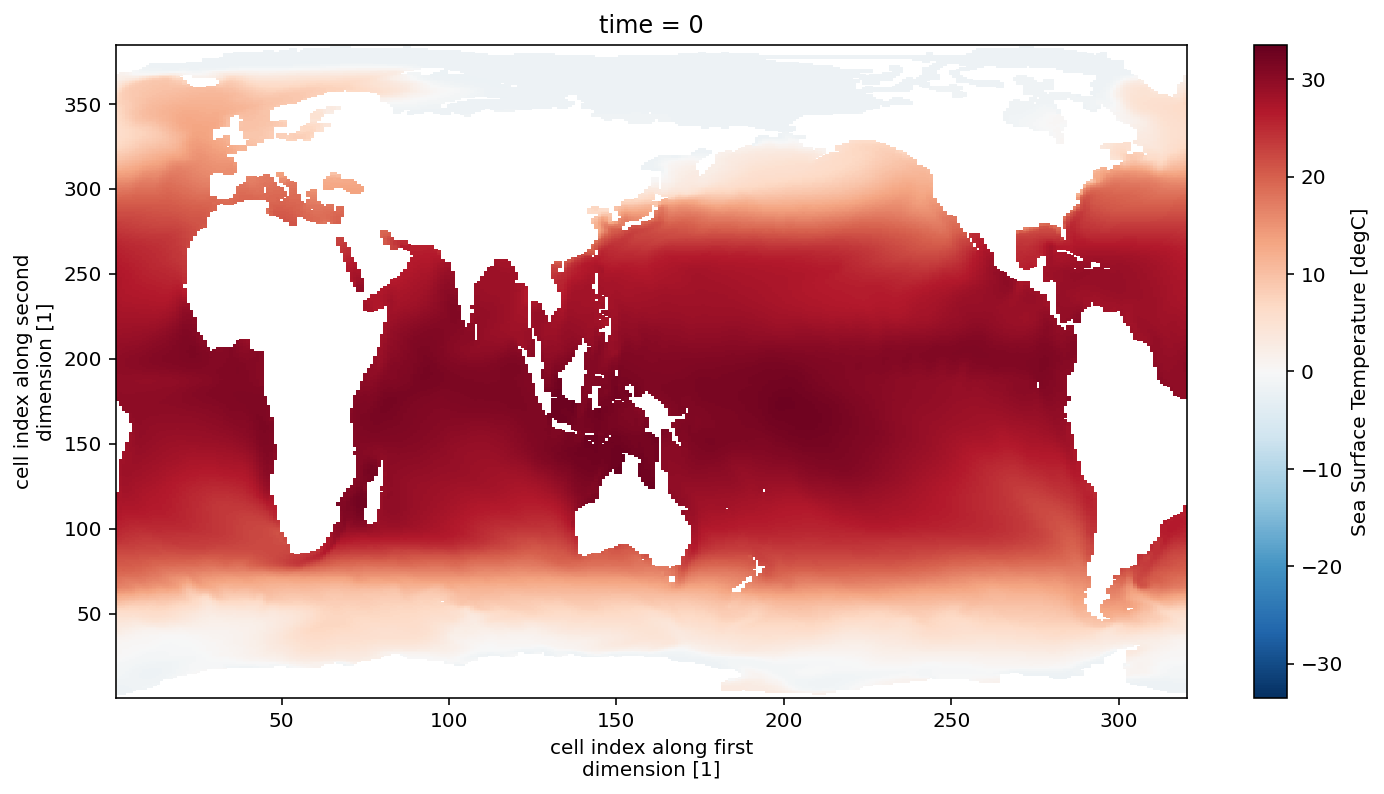

In [ ]:
ds.tos.sel(time=0).squeeze().plot()

In [ ]:
print(ds.dims)

Frozen(SortedKeysDict({'lat': 192, 'nbnd': 2, 'lon': 288, 'time': 732}))
